<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);color: white;text-align:center;font-family: Inter,sans-serif;">
<div style="height:50px, width:50px;">
<svg width="100" height="100" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" id="imdb"><path fill="#DEB122" d="M0 22a2 2 0 0 0 2 2h20a2 2 0 0 0 2-2V2a2 2 0 0 0-2-2H2a2 2 0 0 0-2 2v20z"></path><path d="M19.302 10.312c-.477 0-.798.145-1.12.492V8.57h-1.698v6.847h1.597l.102-.434c.305.365.638.524 1.12.524 1.061 0 1.19-.814 1.19-1.655v-1.928c-.002-.926-.045-1.612-1.191-1.612zm-.858 4.211a.218.218 0 0 1-.203-.129c-.118-.273-.059-2.362-.059-2.394 0-.203-.059-.68.263-.68.391 0 .333.391.333.68v1.752c-.001.289.085.771-.334.771zm-2.63-4.833c-.231-1.206-1.682-1.12-2.625-1.12h-1.318v6.847c4.613.006 4.018.321 4.018-4.419 0-.435.016-.901-.075-1.308zm-2.169 4.539V9.745c.638 0 .552.337.552.857v2.641c0 .519.101 1.002-.552.986zM5.792 8.571h2.293c.177 1.061.321 2.137.466 3.209l.407-3.209h2.304v6.847H9.725V10.79l-.622 4.629H7.999l-.654-4.527v4.527H5.792V8.571zM3.429 8.571h1.768v6.847H3.429z"></path></svg>
</div>
        <h2 style="font-size: 32px;color:white;">📽️IMDB movie data analysis</h4>
    </div>
    

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">⚡ Data Cleaning ⚡</h4>
    </div>

In [122]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [123]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [124]:
df.isna().sum()

Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [125]:
df['MetaScore'].fillna(df['MetaScore'].mean(), inplace=True)
df['Gross'].fillna(df['Gross'].median(), inplace=True)
df = df.dropna(subset=['Certification'])
df.isna().sum()

Unnamed: 0             0
Movie Name             0
Year of Release        0
Run Time in minutes    0
Movie Rating           0
Votes                  0
MetaScore              0
Gross                  0
Genre                  0
Certification          0
Director               0
Stars                  0
Description            0
dtype: int64

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">⚡EDA⚡</h4>
    </div>

In [126]:
df.describe()

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,9631.000000,9631.000000,9631.000000,9631.000000,9.631000e+03,9631.000000,9.631000e+03
mean,5051.417298,2001.048697,110.372339,6.710082,9.561606e+04,59.127553,3.407804e+07
std,2871.802808,18.678590,21.833622,0.812836,1.742768e+05,15.660964,5.876207e+07
min,0.000000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2580.500000,1993.000000,96.000000,6.100000,1.737000e+04,49.000000,6.095000e+06
50%,5073.000000,2006.000000,106.000000,6.700000,3.590500e+04,59.171432,1.693000e+07
75%,7535.500000,2014.000000,120.000000,7.300000,9.540450e+04,69.000000,3.432500e+07
max,9998.000000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


### Distribution of movie ratings
<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">⚡Movie Rating Distribution 📊⚡</h4>
    </div>

<AxesSubplot: xlabel='Movie Rating', ylabel='Count'>

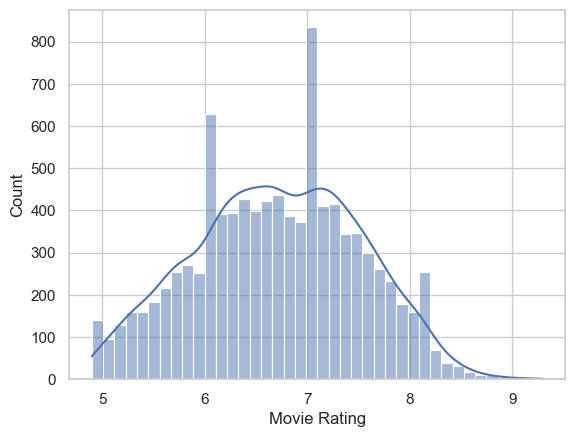

In [127]:

sns.histplot(data= df['Movie Rating'], kde=True)

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Movie Genre Distribution📊</h4>
    </div>

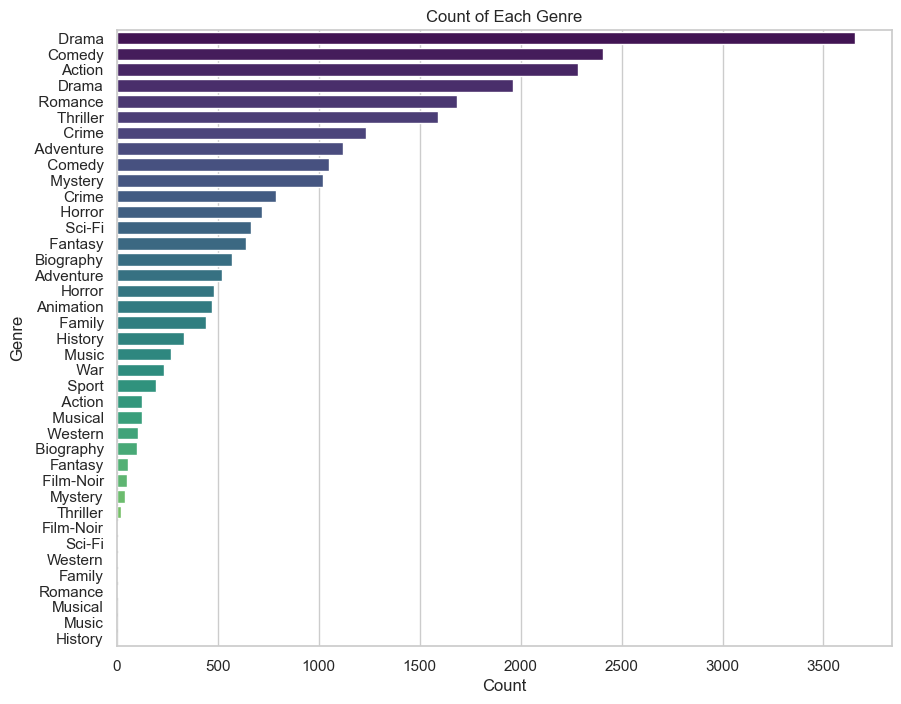

In [128]:
import ast
from collections import Counter
genres = df['Genre']
genre_lists = [ast.literal_eval(genre) for genre in genres]

# Flatten the list of lists
all_genres = [genre for sublist in genre_lists for genre in sublist]
genre_counts = Counter(all_genres)

# Convert the genre counts to a DataFrame
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the genres by count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count of Each Genre')

# Show plot
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Gross collection BoxPlot📊</h4>
    </div>

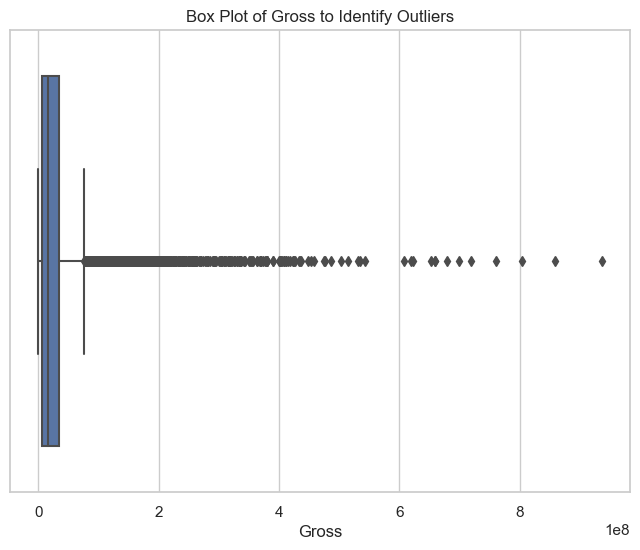

In [129]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Gross'])

plt.xlabel('Gross')
plt.title('Box Plot of Gross to Identify Outliers')

plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Movie Genre Distribution📊</h4>
    </div>

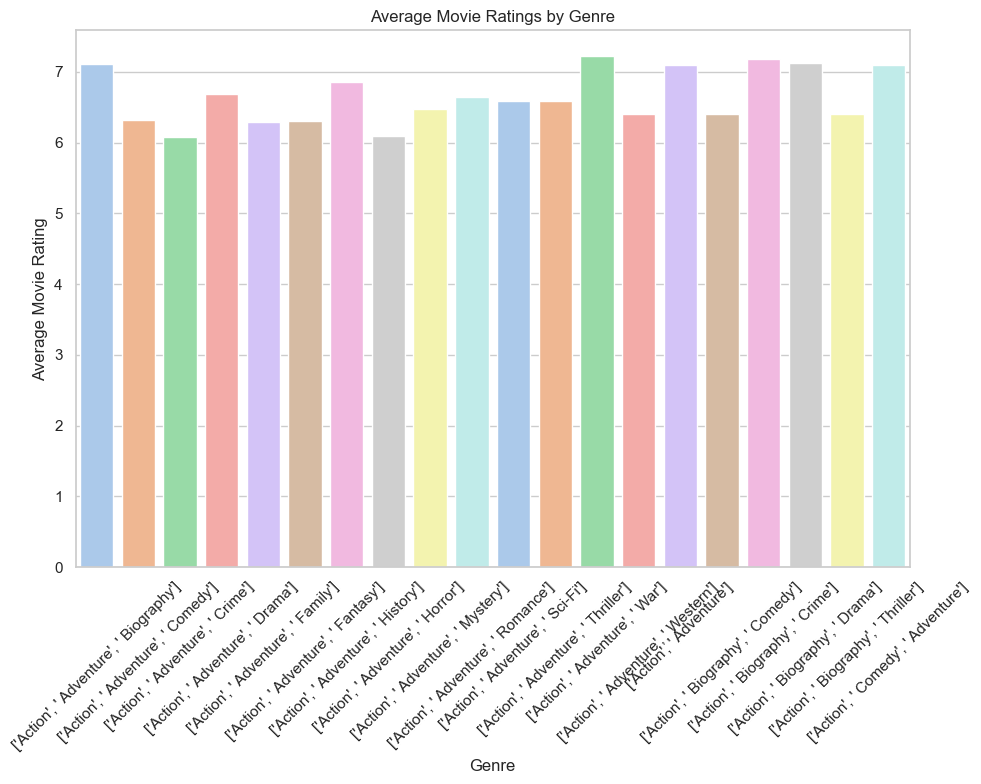

In [130]:
genre_avg_ratings = df.groupby('Genre')['Movie Rating'].mean().reset_index().head(20)

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Genre', y='Movie Rating', data=genre_avg_ratings, palette='pastel')

plt.xlabel('Genre')
plt.ylabel('Average Movie Rating')
plt.title('Average Movie Ratings by Genre')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Trend of movie releases over the years📊</h4>
    </div>

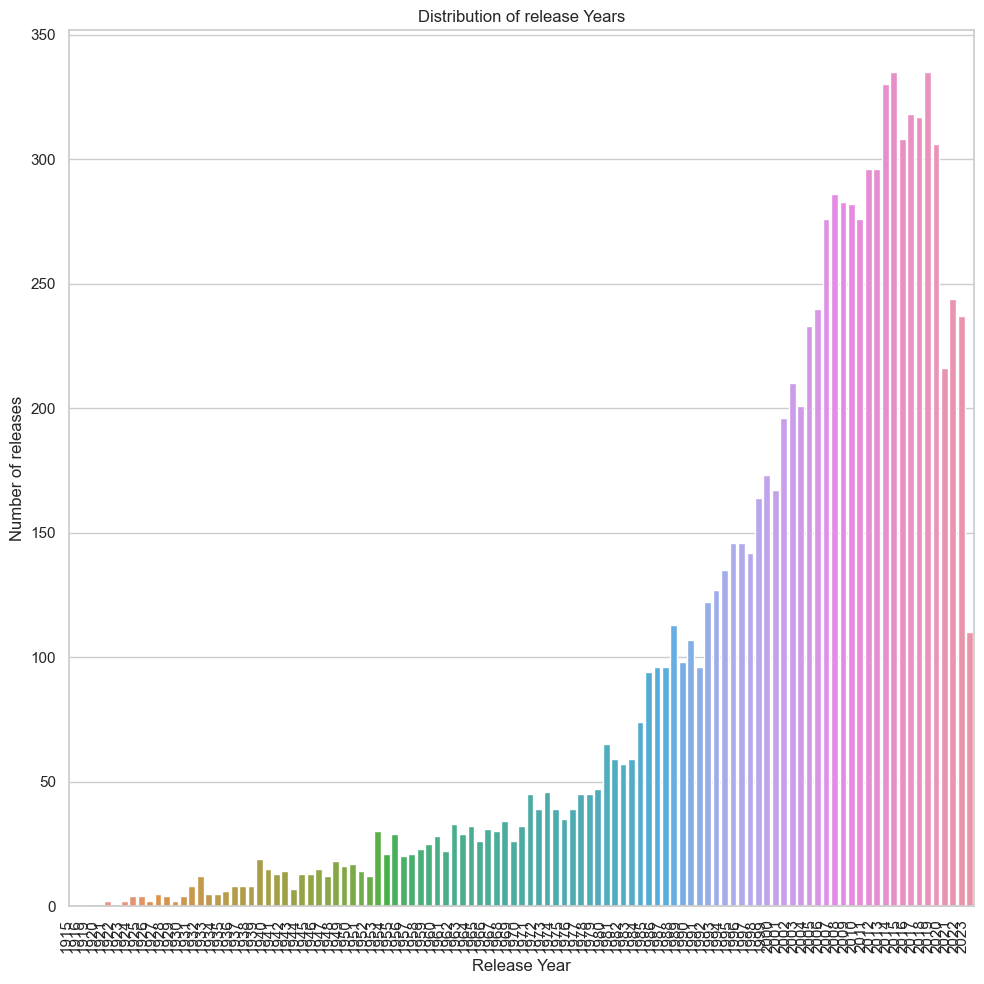

In [131]:
year_counts = df.groupby('Year of Release')['Movie Name'].count()
plt.figure(figsize=(10, 10))
sns.barplot(x = year_counts.index, y = year_counts.values)
plt.title('Distribution of release Years')
plt.xlabel('Release Year')
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Number of releases')
plt.tight_layout()
plt.show()


<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Average rating of movies in various decades📈</h4>
    </div>

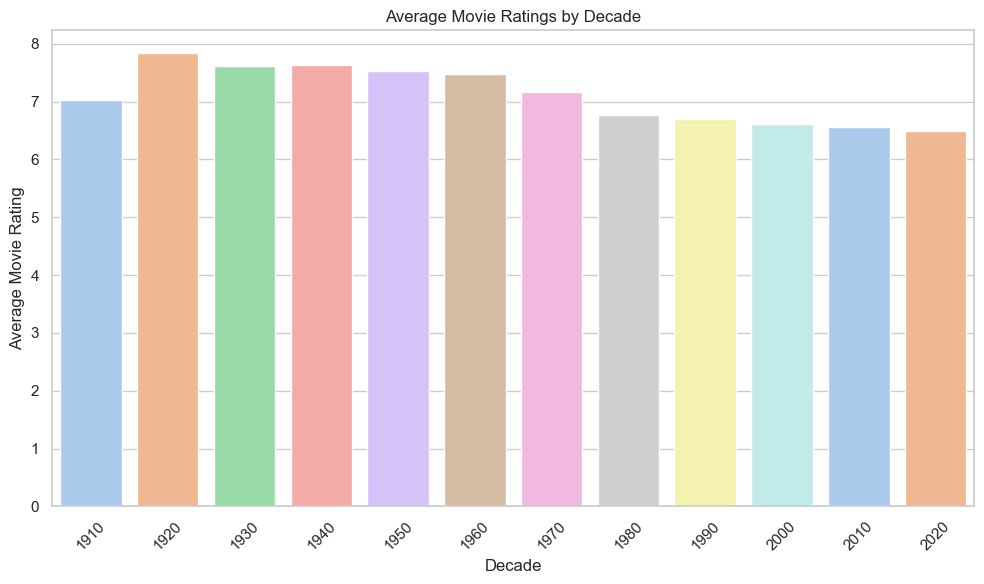

In [132]:
# Convert release year to decade
df['Decade'] = (df['Year of Release'] // 10) * 10

# Calculate the average rating for each decade
decade_avg_ratings = df.groupby('Decade')['Movie Rating'].mean().reset_index()

# Create a bar plot to compare average ratings by decade
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Movie Rating', data=decade_avg_ratings, palette='pastel')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Average Movie Rating')
plt.title('Average Movie Ratings by Decade')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship between Year of release and gross earnings
<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Relationship between Year of Release and Gross earnings📊⚡</h4>
    </div>

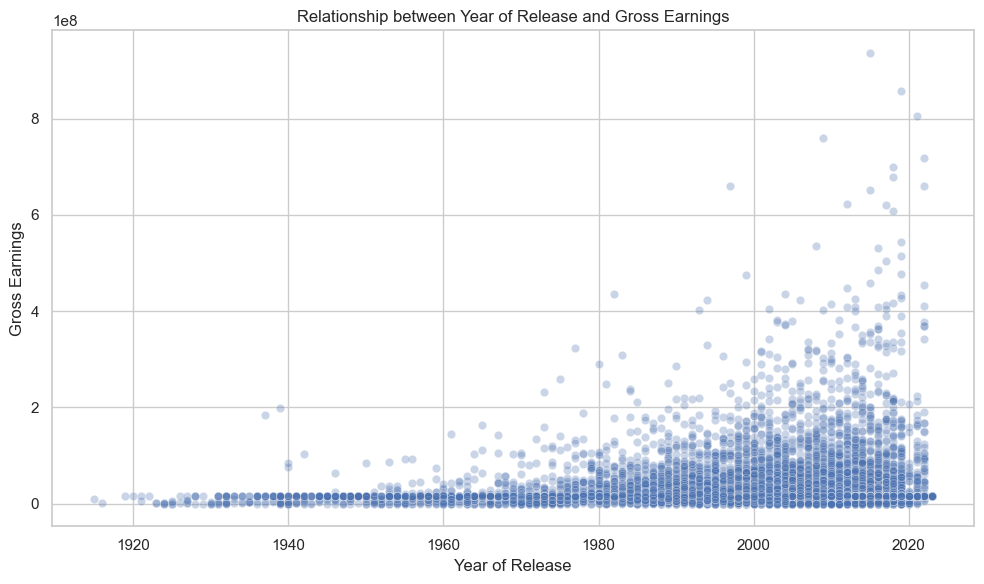

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year of Release', y='Gross', data=df, alpha=0.3)

# Add labels and title
plt.xlabel('Year of Release')
plt.ylabel('Gross Earnings')
plt.title('Relationship between Year of Release and Gross Earnings')

# Show plot
plt.tight_layout()
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Distribution of Certificate Ratings📊</h4>
    </div>

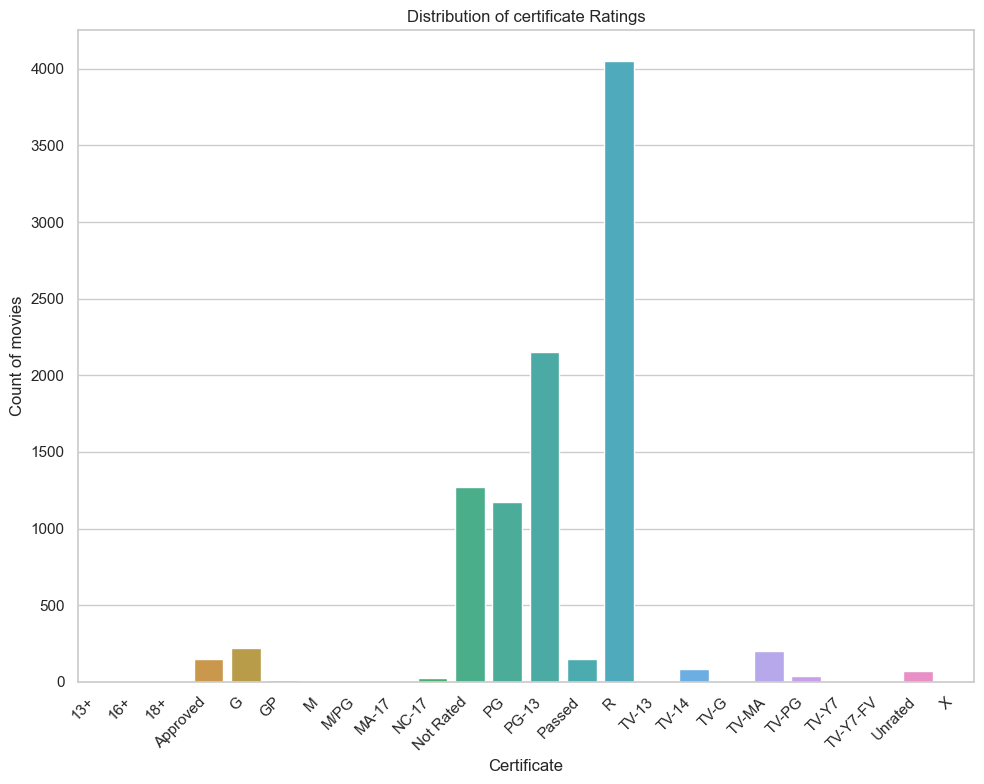

In [134]:
certificate_counts = df.groupby('Certification')['Movie Name'].count()
plt.figure(figsize = (10, 8))
sns.barplot(x = certificate_counts.index, y = certificate_counts.values)
plt.title('Distribution of certificate Ratings')
plt.xlabel('Certificate')
plt.ylabel('Count of movies')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Relation between Ratings and Certification📊</h4>
    </div>

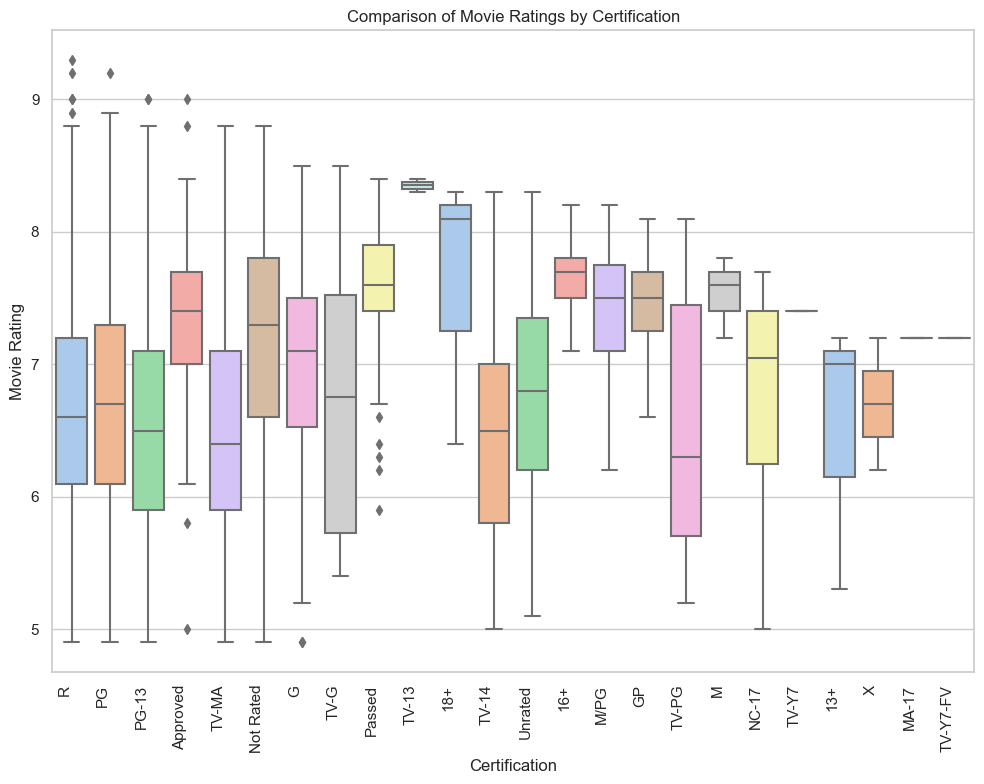

In [135]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Certification', y='Movie Rating', data=df, palette='pastel')

plt.xlabel('Certification')
plt.ylabel('Movie Rating')
plt.xticks(rotation = 90, ha = 'right')
plt.title('Comparison of Movie Ratings by Certification')

plt.tight_layout()
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Relation between Ratings and Run time 📊</h4>
    </div>

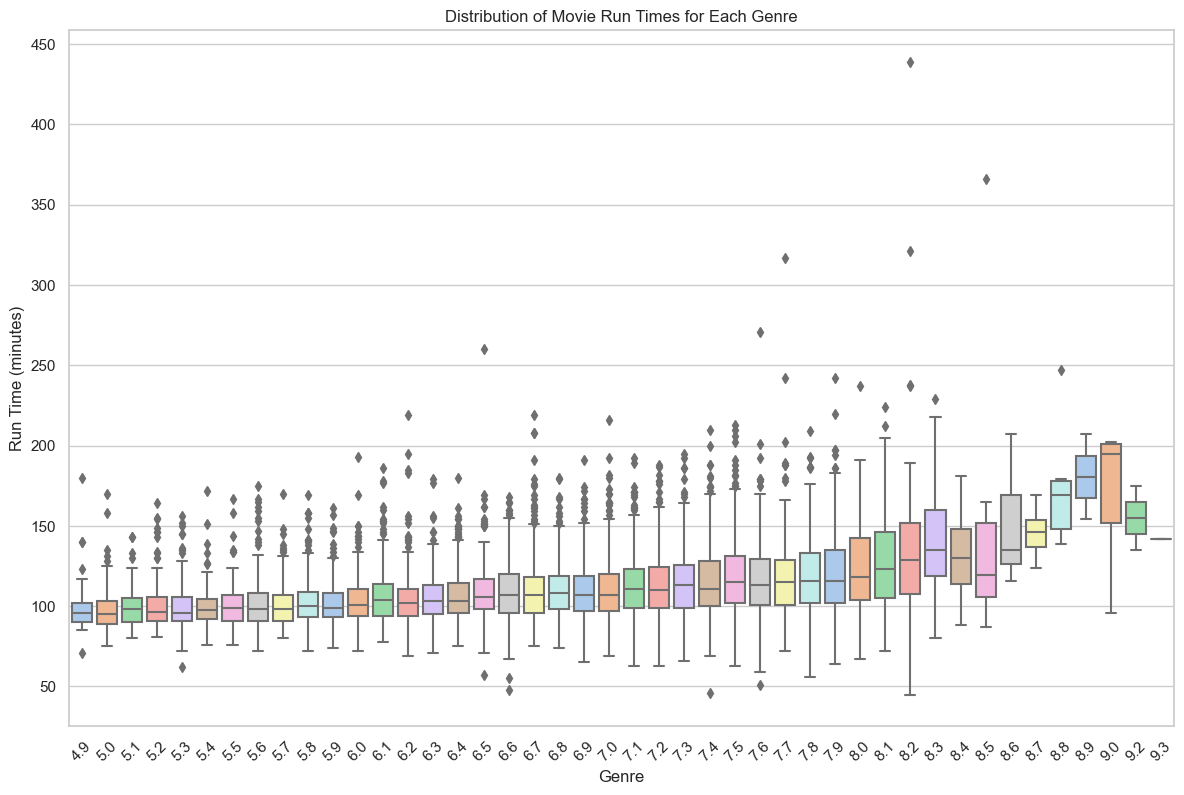

In [136]:
# Create a box plot to explore the distribution of run times for each genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Movie Rating', y='Run Time in minutes', data=df, palette='pastel')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Run Time (minutes)')
plt.title('Distribution of Movie Run Times for Each Genre')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Relation between Certification and Run time 📊</h4>
    </div>

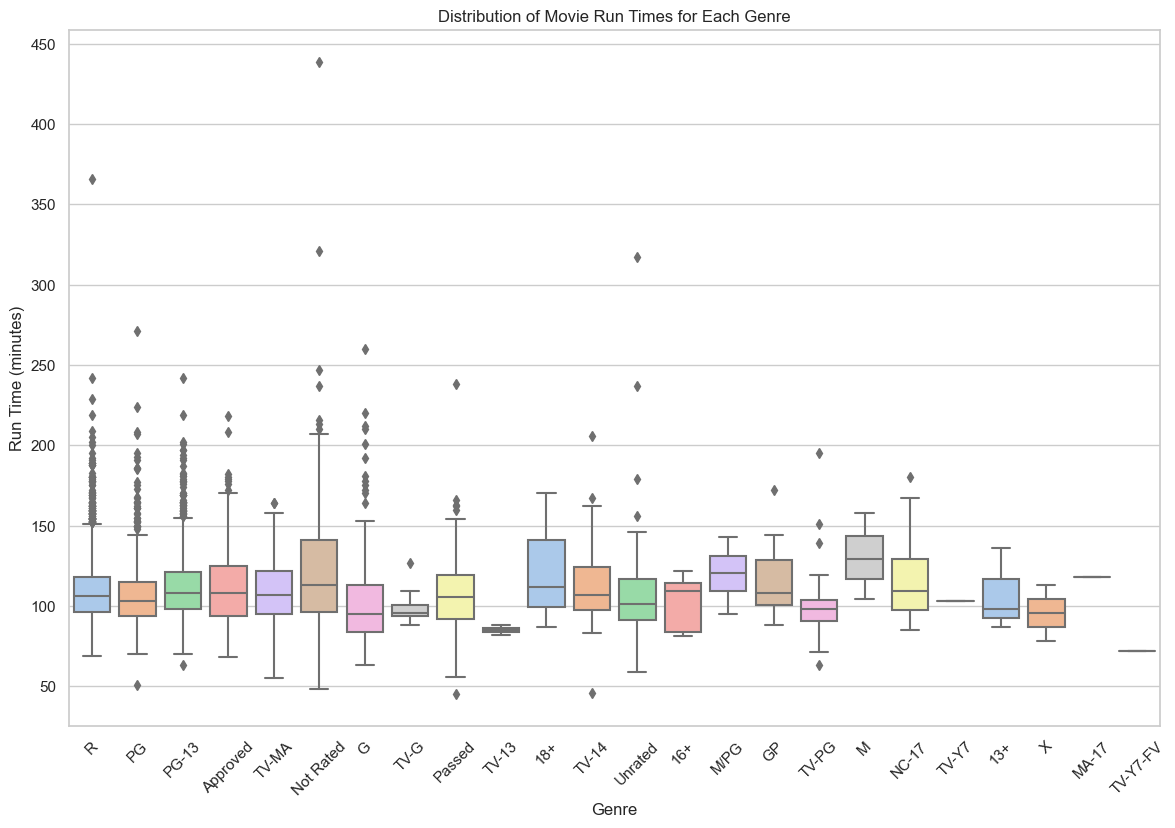

In [137]:
# Create a box plot to explore the distribution of run times for each genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Certification', y='Run Time in minutes', data=df, palette='pastel')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Run Time (minutes)')
plt.title('Distribution of Movie Run Times for Each Genre')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Top 50 Popular Actors📊</h4>
    </div>

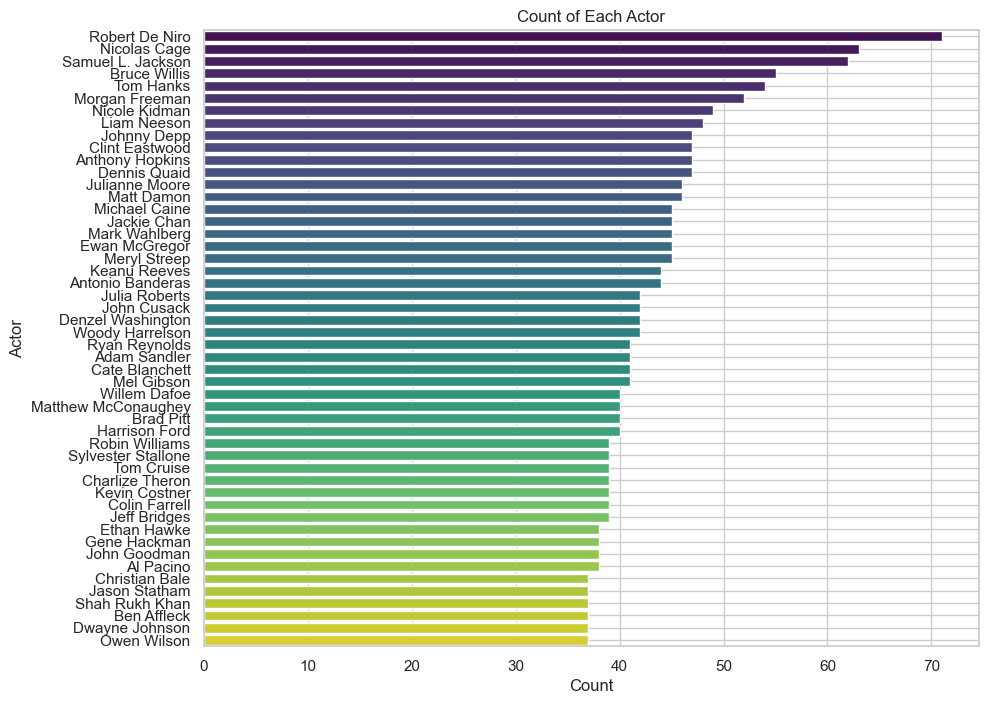

In [138]:
import ast
from collections import Counter
genres = df['Stars']
genre_lists = [ast.literal_eval(genre) for genre in genres]

# Flatten the list of lists
all_genres = [genre for sublist in genre_lists for genre in sublist]
genre_counts = Counter(all_genres)

# Convert the genre counts to a DataFrame
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Actor', 'Count'])

# Sort the genres by count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Actor', data=genre_counts_df.head(50), palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Count of Each Actor')

# Show plot
plt.grid(True)
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Most Common words in movide Descriptions📊</h4>
    </div>


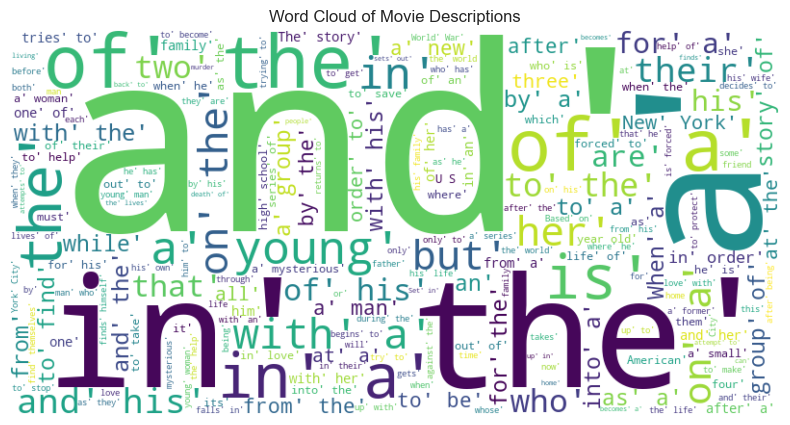

In [139]:
from wordcloud import WordCloud

# Combine all movie descriptions into a single string
all_descriptions = ' '.join(df['Description'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Most Common words in Movie Titles📊</h4>
    </div>

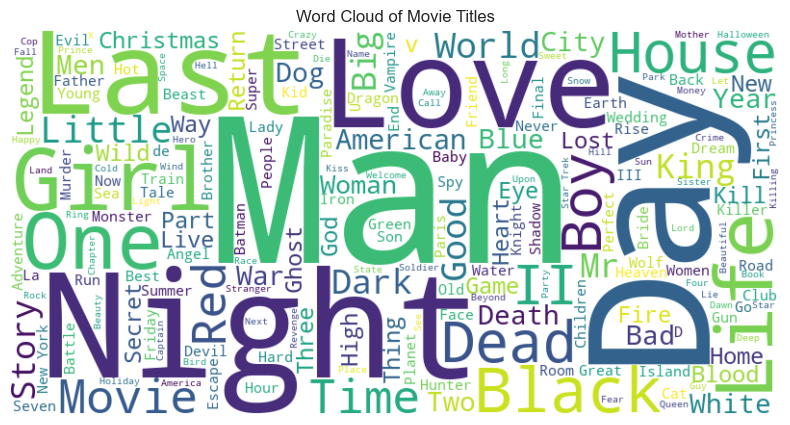

In [140]:
from wordcloud import WordCloud

# Combine all movie descriptions into a single string
all_descriptions = ' '.join(df['Movie Name'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()